read all files and created word list

[('the', 27152), ('of', 14648), ('and', 12224), ('a', 9512), ('to', 8900), ('is', 8248), ('in', 7585), ('for', 6658), ('1', 6299), ('that', 5677)]
Z entropy: -4781831.139171859
program ran



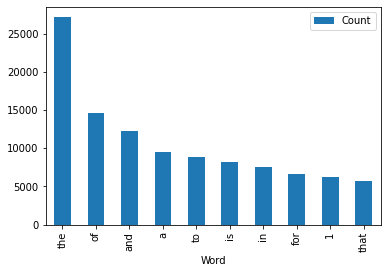

In [13]:
# Q2
# http://proceedings.mlr.press/v70/

# Python3 program for a word frequency
# counter after crawling/scraping a web-page
import requests
import os
from urllib.parse import urljoin
from bs4 import BeautifulSoup
import operator
from collections import Counter
import pandas as pd
import pathlib

import math
 
'''Function defining the web-crawler/core
spider, which will fetch information from
a given website, and push the contents to
the second  function clean_wordlist()'''
 
 
def start(url):

    root = pathlib.Path().resolve()
    # #If there is no such folder, the script will create one automatically
    # folder_location = 'pdfs'
    # if not os.path.exists(folder_location):os.mkdir(folder_location)

    # # clear folder
    # os.system('rm pdfs/*')

    # response = requests.get(url)
    # soup= BeautifulSoup(response.text, "html.parser")     
    # for link in soup.select("a[href$='.pdf']"):
    #     #Name the pdf files using the last portion of each link which are unique in this case
    #     filename = os.path.join(folder_location,link['href'].split('/')[-1])
    #     # print('{0} {1}\n'.format(link['href'].split('/')[-1], filename))
    #     with open(filename, 'wb') as f:
    #         f.write(requests.get(urljoin(url,link['href'])).content)
    #         os.system("pdf2txt.py " + filename + " > " + (os.path.splitext(filename)[0] + '.txt'))
    #     os.remove(filename)
 
    wordlist = []
    for filename in os.listdir('pdfs'):
        path = os.path.join(root, ('pdfs/'+filename))
        with open(path, 'r') as f:
            for line in f:
                wordlist.extend(line.split())

    print('read all files and created word list\n')

    # # empty list to store the contents of
    # # the website fetched from our web-crawler

    # source_code = requests.get(url).text
 
    # # BeautifulSoup object which will
    # # ping the requested url for data
    # soup = BeautifulSoup(source_code, 'html.parser')
 
    # # Text in given web-page is stored under
    # # the <div> tags with class <entry-content>
    # for each_text in soup.findAll('div', {'class': 'entry-content'}):
    #     content = each_text.text
 
    #     # use split() to break the sentence into
    #     # words and convert them into lowercase
    #     words = content.lower().split()
 
    #     for each_word in words:
    #         wordlist.append(each_word)
    clean_wordlist(wordlist)
 
# Function removes any unwanted symbols

 
def clean_wordlist(wordlist):
 
    clean_list = []
    symbols = "!@#$%^&*()_-+={[}]|\;:\"<>?/., "
    for word in wordlist:
        for i in range(len(symbols)):
            word = word.replace(symbols[i], '')
 
        if len(word) > 0:
            clean_list.append(word)
    create_dictionary(clean_list)
 
# Creates a dictionary containing each word's
# count and top_20 ocuuring words
 
 
def create_dictionary(clean_list):
    word_count = {}
 
    for word in clean_list:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
 
    ''' To get the count of each word in
        the crawled page -->
 
    # operator.itemgetter() takes one
    # parameter either 1(denotes keys)
    # or 0 (denotes corresponding values)
 
    for key, value in sorted(word_count.items(),
                    key = operator.itemgetter(1)):
        print ("% s : % s " % (key, value))
 
    <-- '''
    
    c = Counter(word_count)
 
    # returns the most occurring elements
    top = c.most_common(10)
    print(top)

    df = pd.DataFrame(top, columns=['Word', 'Count'])
    df.plot.bar(x='Word', y='Count') 

    entropy = 0
    # part 2
    total_wc = sum(word_count.values())
    for word, count in word_count.items():
        count = count * 1.0 / total_wc
    for word, prob in word_count.items():
        p = int(prob)
        entropy += p * math.log2(p)
    entropy = -1 * entropy

    print('Z entropy: {}'.format(entropy))
 
# Driver code
if __name__ == '__main__':
    url = "http://proceedings.mlr.press/v70/"
    # starts crawling and prints output
    start(url)
    print('program ran\n') 

In [7]:
# Q2 part 2
# Estimate entropy of Z - randomly selected word from one ICML paper
# Entropy formula:
# H = - Sum (p * log(p))

# find pmf of Z
# words = {'word': wordcount}

NameError: name 'word_count' is not defined